In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import operator
%matplotlib inline

In [2]:
df = pd.read_csv("/home/hp/Desktop/College/Sem5/DA/Project/zomato-bangalore-restaurants/zomato.csv")

In [3]:
to_drop = ['url',
           'phone',
           'address',
           'dish_liked',
           'reviews_list',
           'menu_item',
           'listed_in(city)',
           'votes']
df.drop(to_drop, inplace=True, axis=1)
print(df.columns.values)

['name' 'online_order' 'book_table' 'rate' 'location' 'rest_type'
 'cuisines' 'approx_cost(for two people)' 'listed_in(type)']


In [4]:
#remove all , in the approx_cost(for two people) column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x:x.replace(',',''))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [5]:
#convert all num/5 from rating to just num
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x:x.split('/')[0])
# Dealing with instanced with 'NEW'
df['rate'] = df['rate'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['rate'] = df['rate'].apply(lambda x: x.replace('-', str(np.nan)))
df['rate'] = df['rate'].astype(float)

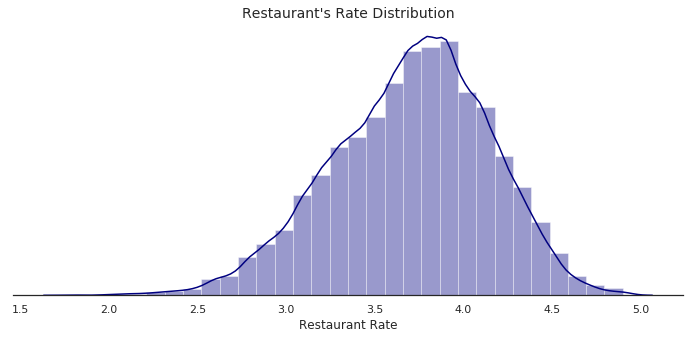

In [7]:
bangalore_rest = df.copy()
sns.set(style='white', palette='muted', color_codes=True)
fig, ax = plt.subplots(figsize=(12, 5))
sns.despine(left=True)
sns.distplot(bangalore_rest['rate'], bins=30, color='navy')
ax.set_title("Restaurant's Rate Distribution", size=14)
ax.set_xlabel('Restaurant Rate')
plt.setp(ax, yticks=[])
plt.show()

In [8]:
bangalore_rest = df.copy()
bangalore_rest.isnull().sum()

#Need to handle missing data
#As there are a lot missing values for column rate we cannot drop it.
#we propose a solution by predicting the rating of these missing values by using KNN
#This is a temprovary solution based on the performance final approach might change


name                               0
online_order                       0
book_table                         0
rate                           10052
location                          21
rest_type                        227
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [9]:
#Too many cusines group them based on the frequency of the cusines as a whole
#If there are multiple cuisines are present pick 2 with most frequency
popular_cusines = dict()
for j in bangalore_rest['cuisines']:
    for i in str(j).split(','):
        i = i.strip()
        if i not in popular_cusines:
            popular_cusines[i] = 1
        else:
            popular_cusines[i] = popular_cusines[i] + 1
#print(sorted(popular_cusines.items(), key=operator.itemgetter(1))[::-1])
#drop all cuisines with less than 500 frequency

cuisines_todel = []
for i in popular_cusines:
    if popular_cusines[i] < 500:
        cuisines_todel.append(i)

for i in bangalore_rest:
    print(i)

name
online_order
book_table
rate
location
rest_type
cuisines
approx_cost(for two people)
listed_in(type)
